In [1]:
import torch 
#원하는 데이터를 자료형 그대로 로드 가능
import pickle 
import matplotlib.pyplot as plt

In [ ]:
# 만들어낸 오염된 사진과 가지고 있는 broken_image사이의 오차를 줄이도록 학습
# 가장 오차가 유사할 때 집어넣은 random 사진이 broken_image 의 원본

In [4]:
shp_original_img = (100,100)
#torch.FloatTensor cpu 에서 float32 type tensor(default 값)
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p','rb'),encoding='latin1'))

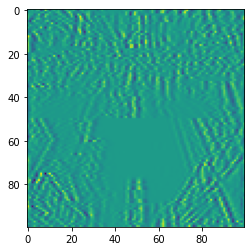

In [14]:
plt.imshow(broken_image.view(100,100))  

In [18]:
def weird_function(x,n_iter=5):
    #n_iter == 5 default
    h = x
    filt = torch.tensor([-1./3,1./3,-1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([0.])
        
        # 맨 위의 행은 zero_tensor / 그 아래행은 0 <= index < -1 axis = 0 행
        h_l = torch.cat((zero_tensor,h[:-1]),0)
        # 맨 위의 행은  1 <= index <= -1 / 그 아래행은 zero_tensor
        h_r = torch.cat((h[1:],zero_tensor),0)
        #조합
        h = filt[0]*h + filt[2]*h_l +filt[1]*h_r
        #짝수 번째 값에서 위아래 셔플해준다 h.shape[0]//2 > 행 수 나누기 2 정수형태
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]),0)
    return h

In [37]:
#torch.randn 평균이 0이고 표준편차가 1인 가우시안 정규분포에서 무작위로 생성  
#1차원 / shape =[10000] image 가 100 x 100 이므로 
random_tensor = torch.randn(10000, dtype = torch.float)
early,cnt,i = 1000 , 0 , 0
lr = 0.8
while True: 
    #requires_grad_(True) : random_tensor 이루어진 모든 연산 추적
    random_tensor.requires_grad_(True)
    #만들어낸 가상이미지
    hypothesis = weird_function(random_tensor)
    #오차
    loss = torch.dist(hypothesis,broken_image)
    #자동으로 모든 기울기 계산
    loss.backward()
    
    #경사 하강법 수동
    with torch.no_grad():
        random_tensor = random_tensor - lr* random_tensor.grad
    
    if i % 1000 == 0:
        print(f'Loss at {i} = {loss.item()}')
        
        if early - loss.item() < 0.0001:
            cnt+=1
        else:
            cnt = 0 
        early = loss.item()
    #stop
    if cnt > 10:
        break
    i += 1
        

Loss at 0 = 12.378730773925781
Loss at 1000 = 1.1844456195831299
Loss at 2000 = 0.5747326612472534
Loss at 3000 = 0.39599934220314026
Loss at 4000 = 0.31160253286361694
Loss at 5000 = 0.25996050238609314
Loss at 6000 = 0.22318947315216064
Loss at 7000 = 0.19434234499931335
Loss at 8000 = 0.17013366520404816
Loss at 9000 = 0.14884576201438904
Loss at 10000 = 0.1295131891965866
Loss at 11000 = 0.11155776679515839
Loss at 12000 = 0.0946112796664238
Loss at 13000 = 0.07842784374952316
Loss at 14000 = 0.06283549964427948
Loss at 15000 = 0.04771199822425842
Loss at 16000 = 0.032968681305646896
Loss at 17000 = 0.021128777414560318
Loss at 18000 = 0.021164873614907265
Loss at 19000 = 0.02116715908050537
Loss at 20000 = 0.021167846396565437
Loss at 21000 = 0.02116772159934044
Loss at 22000 = 0.021168405190110207
Loss at 23000 = 0.021167639642953873
Loss at 24000 = 0.02116904966533184
Loss at 25000 = 0.021170077845454216
Loss at 26000 = 0.021171260625123978
Loss at 27000 = 0.021172165870666504
L

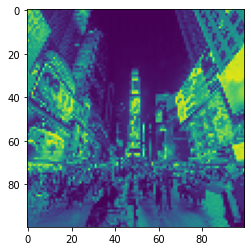

In [38]:
plt.imshow(random_tensor.view(100,100).data) 

tensor([0.])